In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.simplefilter("ignore")

In [2]:
dataset = pd.read_csv("../input/dataset.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [4]:
clf1 = svm.SVC(decision_function_shape='ovr')
clf1.fit(x_train, y_train)

SVC()

In [5]:
y_pred_svm = clf1.predict(x_test)

In [6]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_svm)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_svm, average='weighted')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_svm, average='weighted')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_svm, average='weighted')))


Accuracy: 0.70

Micro Precision: 0.55
Micro Recall: 0.70
Micro F1-score: 0.60



In [7]:
confusion_1 = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix\n')
print(confusion_1)

Confusion Matrix

[[15  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 2 10  0  0  0  0]
 [ 4  4  0  0  0  1]
 [ 0  1  0  0  0  7]]


In [8]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 1 15]
 [ 2 14]
 [ 3 16]
 [ 4 12]
 [ 5  9]
 [ 6  8]]


In [9]:
clf2 = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = clf2.predict(x_test)

In [10]:
confusion_2 = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix\n')
print(confusion_2)

Confusion Matrix

[[15  0  0  0  0  0]
 [ 0 13  0  1  0  0]
 [ 0  0 15  1  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  9  0]
 [ 2  1  1  0  0  4]]


In [11]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_dt)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_dt, average='weighted')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_dt, average='weighted')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_dt, average='weighted')))


Accuracy: 0.92

Micro Precision: 0.93
Micro Recall: 0.92
Micro F1-score: 0.91



In [12]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

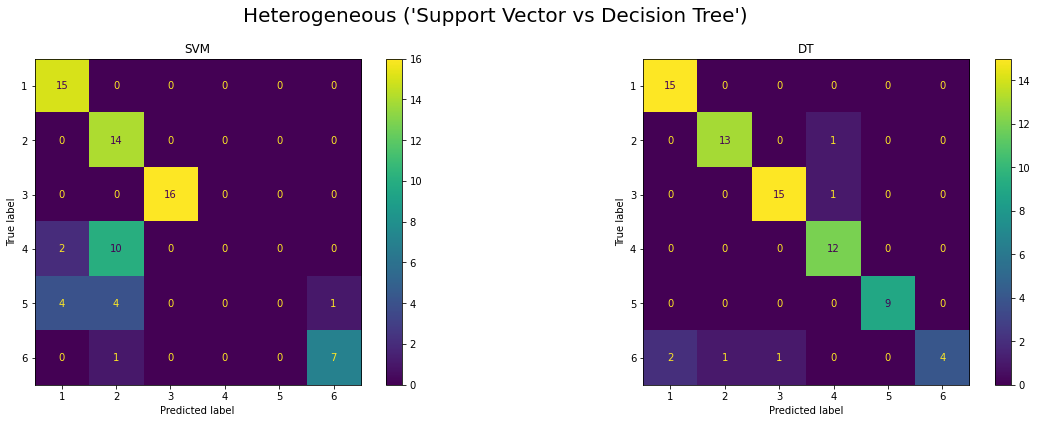

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
plot_confusion_matrix(clf1, x_test, y_test, ax=ax1)
ax1.set_title("SVM")
plot_confusion_matrix(clf2, x_test, y_test, ax=ax2)
ax2.set_title("DT")
fig.text(0.5, 1, "Heterogeneous ('Support Vector vs Decision Tree')", verticalalignment ='top', horizontalalignment ='center', fontsize = 20);
# fig.savefig("Heterogeneous Difference", dpi=1000)

In [14]:
clf3 = GaussianNB().fit(x_train, y_train)
y_pred_gnb = clf3.predict(x_test)
confusion_3 = confusion_matrix(y_test, y_pred_gnb)
print('Confusion Matrix\n')
print(confusion_3)

Confusion Matrix

[[15  0  0  0  0  0]
 [ 0  4  0  9  1  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  9  0]
 [ 0  2  0  0  0  6]]


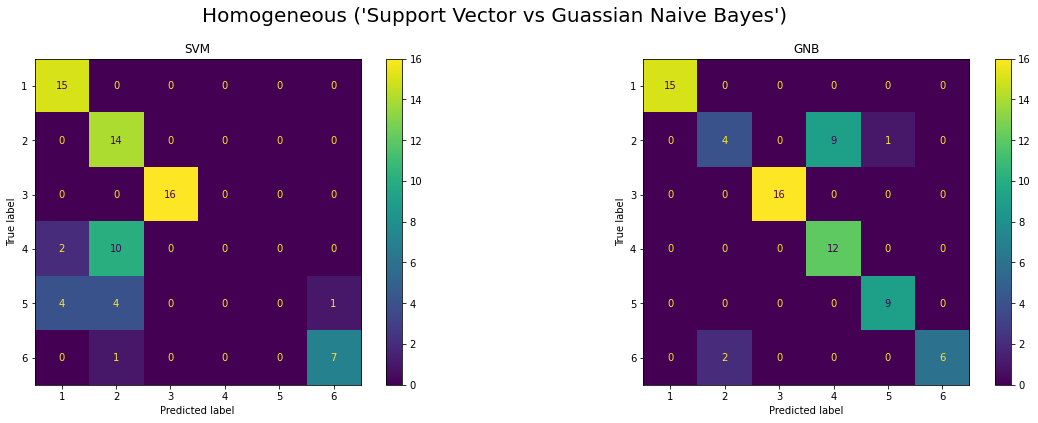

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
plot_confusion_matrix(clf1, x_test, y_test, ax=ax1)
ax1.set_title("SVM")
plot_confusion_matrix(clf3, x_test, y_test, ax=ax2)
ax2.set_title("GNB")
fig.text(0.5, 1, "Homogeneous ('Support Vector vs Guassian Naive Bayes')", verticalalignment ='top', horizontalalignment ='center', fontsize = 20);
# fig.savefig("Heterogeneous Difference", dpi=1000)

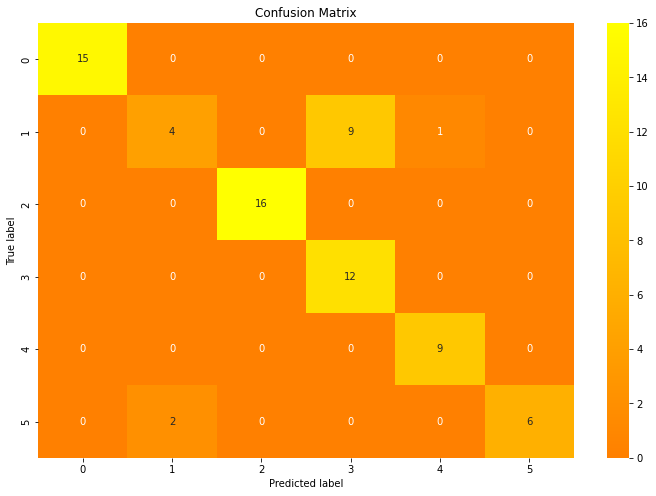

In [18]:
draw_confusion_matrix(confusion_3)